In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("dataset.csv")

Saving dataset.csv to dataset.csv


In [ ]:
print(df.head())

         Date            Location  Latitude  Longitude    SST  pH Level  \
0  01-01-2015             Red Sea   20.0248    38.4931  29.47     8.107   
1  07-01-2015  Great Barrier Reef  -18.2988   147.7782  29.65     8.004   
2  14-01-2015       Caribbean Sea   14.9768   -75.0233  28.86     7.947   
3  20-01-2015  Great Barrier Reef  -18.3152   147.6486  28.97     7.995   
4  27-01-2015           Galápagos   -0.8805   -90.9769  28.60     7.977   

  Bleaching Severity  Species Observed  Marine Heatwave  
0                NaN               106            False  
1               High               116            False  
2               High                90            False  
3             Medium                94            False  
4                NaN               110            False  


Implementing Logistic Regression

Saving dataset.csv to dataset (1).csv

Feature Importance Table:

              Feature  Importance
3                 SST    1.169082
5  Bleaching Severity   -0.229563
4            pH Level    0.137481
6     Marine Heatwave    0.121630
1            Latitude    0.013531
0            Location    0.009618
2           Longitude    0.000165


/tmp/ipython-input-4-1361258406.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_lr, palette='coolwarm')


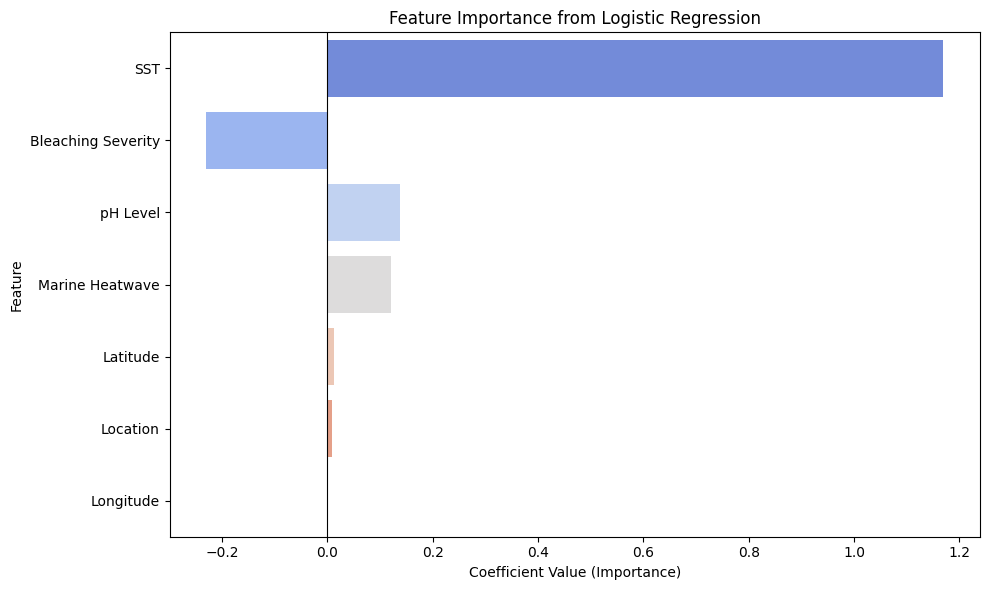

In [ ]:
# STEP 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# STEP 1: Load the dataset
from google.colab import files
uploaded = files.upload()

# Replace 'dataset.csv' with your filename if needed
df = pd.read_csv("dataset.csv")

# STEP 2: Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 3: Drop unnecessary columns
df.drop(['Date', 'Species Observed'], axis=1, inplace=True)

# STEP 4: Encode categorical features
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# STEP 5: Train-test split
X = df.drop('Collapse', axis=1)
y = df['Collapse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# STEP 7: Feature importance
importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

print("\nFeature Importance Table:\n")
print(importance_lr)

# STEP 8: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_lr, palette='coolwarm')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()


Implementing Random Forest Classifier

Saving dataset.csv to dataset (2).csv

Feature Importance Table:

              Feature  Importance
3                 SST    0.308541
4            pH Level    0.177047
1            Latitude    0.162516
2           Longitude    0.150043
6     Marine Heatwave    0.095202
5  Bleaching Severity    0.059225
0            Location    0.047427


/tmp/ipython-input-5-2325563287.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_rf, palette='viridis')


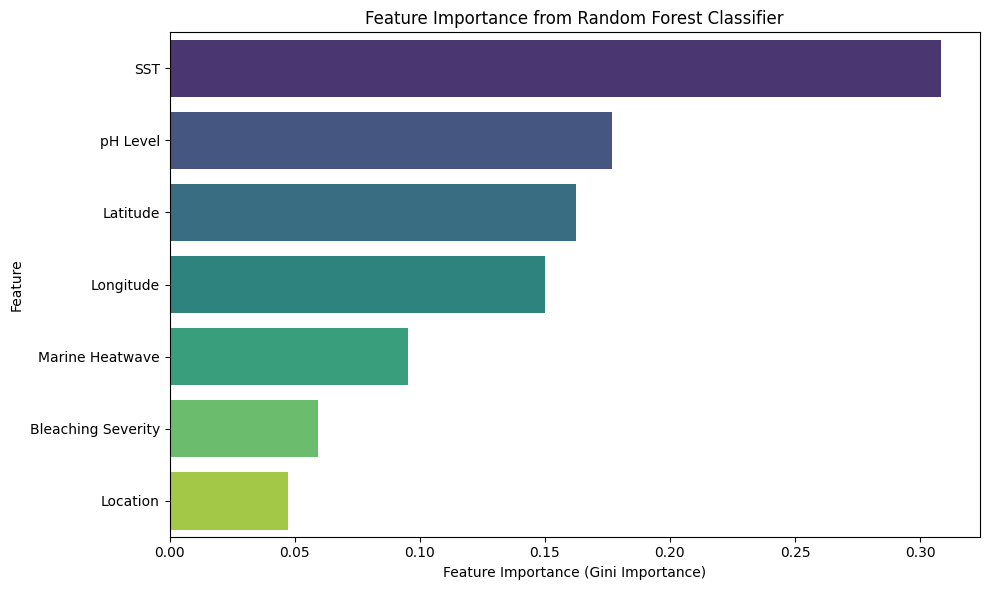

In [ ]:
# STEP 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# STEP 1: Load the dataset
from google.colab import files
uploaded = files.upload()

# Replace 'dataset.csv' with your filename if needed
df = pd.read_csv("dataset.csv")

# STEP 2: Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 3: Drop unnecessary columns
df.drop(['Date', 'Species Observed'], axis=1, inplace=True)

# STEP 4: Encode categorical features
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# STEP 5: Train-test split
X = df.drop('Collapse', axis=1)
y = df['Collapse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 7: Feature importance
importances = rf.feature_importances_
importance_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Table:\n")
print(importance_rf)

# STEP 8: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_rf, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Feature Importance (Gini Importance)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Implementing Linear SVM

Saving dataset.csv to dataset (3).csv

Feature Importance Table (Linear SVM):

              Feature  Importance
3                 SST    0.348321
6     Marine Heatwave    0.118440
5  Bleaching Severity   -0.065649
1            Latitude    0.041196
4            pH Level    0.031176
2           Longitude    0.009017
0            Location    0.002789


/tmp/ipython-input-6-2309594835.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_svm, palette='rocket')


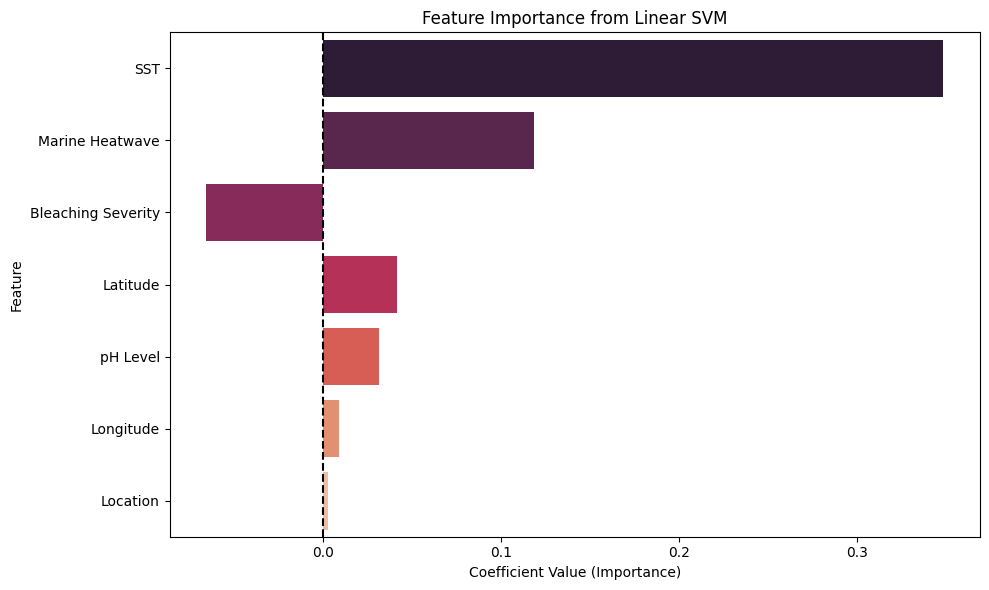

In [ ]:
# STEP 0: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# STEP 1: Load the dataset
from google.colab import files
uploaded = files.upload()

# Replace 'dataset.csv' with your filename if needed
df = pd.read_csv("dataset.csv")

# STEP 2: Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 3: Drop unnecessary columns
df.drop(['Date', 'Species Observed'], axis=1, inplace=True)

# STEP 4: Encode categorical features
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# STEP 5: Train-test split
X = df.drop('Collapse', axis=1)
y = df['Collapse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Standardization (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 7: Linear SVM
svm_clf = LinearSVC(max_iter=10000, random_state=42)
svm_clf.fit(X_train_scaled, y_train)

# STEP 8: Feature importance via coefficients
importance_svm = pd.DataFrame({
    'Feature': X.columns,
    'Importance': svm_clf.coef_[0]
}).sort_values(by='Importance', key=abs, ascending=False)

print("\nFeature Importance Table (Linear SVM):\n")
print(importance_svm)

# STEP 9: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_svm, palette='rocket')
plt.title('Feature Importance from Linear SVM')
plt.xlabel('Coefficient Value (Importance)')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


Implementing XGBoost Classifier

Saving dataset.csv to dataset (4).csv

Feature Importance Table (XGBoost):

              Feature  Importance
3                 SST    0.375568
5  Bleaching Severity    0.135949
1            Latitude    0.127916
4            pH Level    0.127279
2           Longitude    0.122053
0            Location    0.111235
6     Marine Heatwave    0.000000


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:13:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/tmp/ipython-input-7-2343520320.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_xgb, palette='crest')


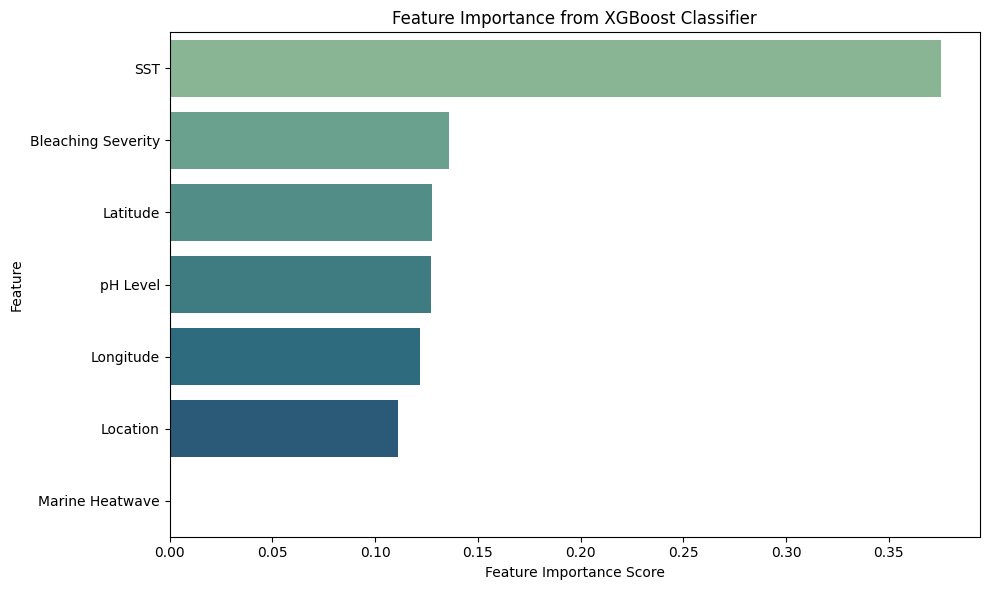

In [ ]:
# STEP 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# STEP 2: Load dataset
from google.colab import files
uploaded = files.upload()

# Replace with your actual filename if needed
df = pd.read_csv("dataset.csv")

# STEP 3: Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 4: Drop unnecessary columns
df.drop(['Date', 'Species Observed'], axis=1, inplace=True)

# STEP 5: Encode categorical features
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# STEP 6: Train-test split
X = df.drop('Collapse', axis=1)
y = df['Collapse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)

# STEP 8: Feature importance
importance_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Table (XGBoost):\n")
print(importance_xgb)

# STEP 9: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_xgb, palette='crest')
plt.title('Feature Importance from XGBoost Classifier')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Implementing KNN Classifier

Saving dataset.csv to dataset (5).csv

Feature Importance Table (KNN via Permutation):

              Feature  Importance
6     Marine Heatwave      0.1005
3                 SST      0.0390
5  Bleaching Severity      0.0250
0            Location      0.0220
2           Longitude      0.0215
1            Latitude      0.0180
4            pH Level      0.0145


/tmp/ipython-input-8-210698949.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_knn, palette='flare')


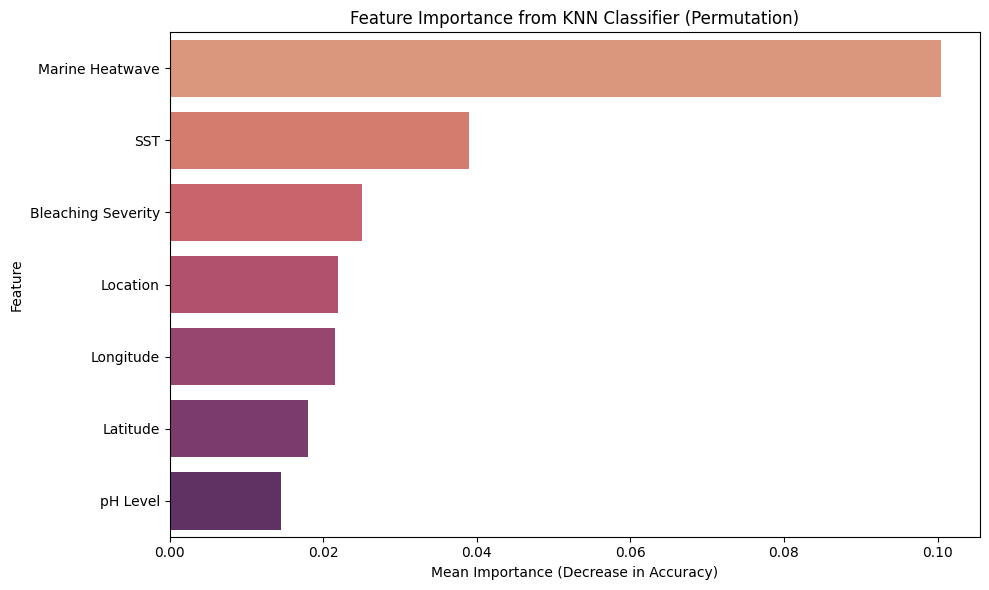

In [ ]:

# STEP 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

# STEP 2: Load dataset
from google.colab import files
uploaded = files.upload()

# Load CSV
df = pd.read_csv("dataset.csv")

# STEP 3: Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 4: Drop unused columns
df.drop(['Date', 'Species Observed'], axis=1, inplace=True)

# STEP 5: Encode categorical features
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# STEP 6: Train-test split
X = df.drop('Collapse', axis=1)
y = df['Collapse']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Scale features (very important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 8: Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# STEP 9: Permutation Feature Importance (since KNN doesn't have coefficients)
perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=20, random_state=42)

# STEP 10: Format importance into DataFrame
importance_knn = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance Table (KNN via Permutation):\n")
print(importance_knn)

# STEP 11: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_knn, palette='flare')
plt.title('Feature Importance from KNN Classifier (Permutation)')
plt.xlabel('Mean Importance (Decrease in Accuracy)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


Feature Importance Comparison across all models

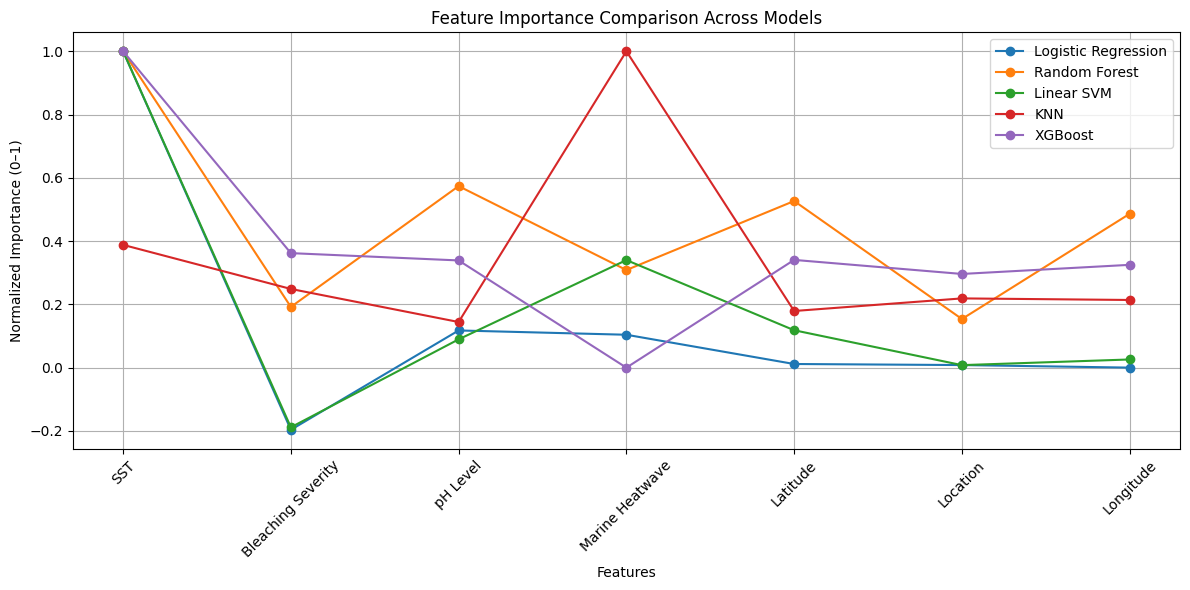

In [ ]:
# STEP 0: Prepare individual importance DataFrames (you should already have them)
# Each must have: ['Feature', 'Importance'] columns
# e.g. importance_lr, importance_rf, etc. are your earlier outputs

# STEP 1: Combine Importances
all_importances = [importance_lr, importance_rf, importance_svm, importance_knn, importance_xgb]
model_names = ['Logistic Regression', 'Random Forest', 'Linear SVM', 'KNN', 'XGBoost']

# Merge into one DataFrame
feature_importance_df = pd.DataFrame()

for imp_df, name in zip(all_importances, model_names):
    feature_importance_df[name] = imp_df.set_index('Feature')['Importance']

# Align indexes and fill missing with 0
feature_importance_df = feature_importance_df.fillna(0)
feature_importance_df['Mean_Importance'] = feature_importance_df.mean(axis=1)

# STEP 2: Normalize for 0-1 scale comparison
normalized_df = feature_importance_df.drop(columns=["Mean_Importance"])
normalized_df = normalized_df / normalized_df.max()

# STEP 3: Plotting with Line Graph and Annotations
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot each model's line and annotate each point
for model in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[model], marker='o', label=model)

    # Annotate each point for this model
    '''for i, value in enumerate(normalized_df[model]):
        plt.annotate(
            f"{value:.2f}",
            (normalized_df.index[i], value),
            textcoords="offset points",
            xytext=(0, 5),  # vertical offset
            ha='center',
            fontsize=8,
            color='black'
        )'''

plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Normalized Importance (0–1)")
plt.title("Feature Importance Comparison Across Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Calculating Evaluation Metrics using XGBoost model and SST, Bleaching Severity, Location and Longitude

In [ ]:
# STEP 0: Re-import everything (in case of runtime reset)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# STEP 1: Load the dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset.csv")  # Make sure the file name is correct

# STEP 2: Check columns
print("Available columns:", df.columns.tolist())

# STEP 3: Create binary target column
if 'Species Observed' in df.columns:
    df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)
else:
    raise KeyError("❌ Column 'Species Observed' not found in the uploaded dataset.")

# STEP 4: Encode categorical features
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# STEP 5: Select required features
features = ['SST', 'Bleaching Severity', 'Location', 'Longitude']
X = df[features]
y = df['Collapse']

# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train and Evaluate XGBoost Classifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 8: Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (13).csv
Available columns: ['Date', 'Location', 'Latitude', 'Longitude', 'SST', 'pH Level', 'Bleaching Severity', 'Species Observed', 'Marine Heatwave']


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:53:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Evaluation Metrics:
Accuracy : 0.84
Precision: 0.70
Recall   : 0.35
F1 Score : 0.47


Calculating Evaluation Metrics using Random Forest model and SST, Bleaching Severity, Location and Longitude

In [ ]:
from sklearn.ensemble import RandomForestClassifier

from google.colab import files
uploaded = files.upload()

# Recreate the binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode categorical variables
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

df['Marine Heatwave'] = df['Marine Heatwave'].astype(int)

# Select the same parameters as before
features = ['SST', 'Bleaching Severity', 'Location', 'Longitude']
X = df[features]
y = df['Collapse']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\n✅ Evaluation Metrics:")
print(f"Accuracy : {accuracy_rf:.2f}")
print(f"Precision: {precision_rf:.2f}")
print(f"Recall   : {recall_rf:.2f}")
print(f"F1 Score : {f1_rf:.2f}")

Saving dataset.csv to dataset (15).csv

✅ Evaluation Metrics:
Accuracy : 0.86
Precision: 0.80
Recall   : 0.40
F1 Score : 0.53


Calculating Evaluation Metrics using Random Forest model and SST

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Load dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("dataset.csv")  # Replace if filename differs

# STEP 2: Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 3: Select SST as the only feature
X = df[['SST']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Predict and Evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation Metrics using only SST:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (16).csv

✅ Evaluation Metrics using only SST:
Accuracy : 0.80
Precision: 0.50
Recall   : 0.40
F1 Score : 0.44


Calculating Evaluation Metrics using Random Forest model and SST and Bleaching Severity

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Bleaching Severity
le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

# STEP 3: Select features and target
X = df[['SST', 'Bleaching Severity']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = rf.predict(X_test)

# STEP 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using SST + Bleaching Severity:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (17).csv

✅ Evaluation using SST + Bleaching Severity:
Accuracy : 0.87
Precision: 0.73
Recall   : 0.55
F1 Score : 0.63


Calculating Evaluation Metrics using XGBoost model and SST and Bleaching Severity

In [ ]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# STEP 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 3: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Bleaching Severity
le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

# STEP 4: Select features and target
X = df[['SST', 'Bleaching Severity']]
y = df['Collapse']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# STEP 7: Predictions
y_pred = xgb.predict(X_test)

# STEP 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using SST + Bleaching Severity:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (18).csv

✅ Evaluation using SST + Bleaching Severity:
Accuracy : 0.84
Precision: 0.67
Recall   : 0.40
F1 Score : 0.50


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:55:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Calculating Evaluation Metrics using XGBoost model and SST and Location

In [ ]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# STEP 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 3: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Location (categorical)
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# STEP 4: Select features and target
X = df[['SST', 'Location']]
y = df['Collapse']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# STEP 7: Predictions
y_pred = xgb.predict(X_test)

# STEP 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using SST + Location:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (19).csv

✅ Evaluation using SST + Location:
Accuracy : 0.82
Precision: 0.62
Recall   : 0.25
F1 Score : 0.36


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:57:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Calculating Evaluation Metrics using Random Forest model and SST and Location

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Location (categorical)
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# STEP 3: Select features and target
X = df[['SST', 'Location']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = rf.predict(X_test)

# STEP 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using SST + Location:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (20).csv

✅ Evaluation using SST + Location:
Accuracy : 0.82
Precision: 0.62
Recall   : 0.25
F1 Score : 0.36


XGBoost(SST+Longitude)

In [ ]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# STEP 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 3: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 4: Select features and target
X = df[['SST', 'Longitude']]
y = df['Collapse']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# STEP 7: Predictions
y_pred = xgb.predict(X_test)

# STEP 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using SST + Longitude:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (21).csv

✅ Evaluation using SST + Longitude:
Accuracy : 0.84
Precision: 0.70
Recall   : 0.35
F1 Score : 0.47


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:00:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest(SST+Longitude)

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# STEP 3: Select features and target
X = df[['SST', 'Longitude']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = rf.predict(X_test)

# STEP 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using SST + Longitude:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (22).csv

✅ Evaluation using SST + Longitude:
Accuracy : 0.83
Precision: 0.71
Recall   : 0.25
F1 Score : 0.37


XGBoost(Bleaching + Location)

In [ ]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# STEP 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 3: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode categorical features
le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# STEP 4: Select features and target
X = df[['Bleaching Severity', 'Location']]
y = df['Collapse']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# STEP 7: Predictions
y_pred = xgb.predict(X_test)

# STEP 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using Bleaching Severity + Location:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (23).csv

✅ Evaluation using Bleaching Severity + Location:
Accuracy : 0.80
Precision: 0.00
Recall   : 0.00
F1 Score : 0.00


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:04:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest(Bleaching + Location)

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode categorical features
le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# STEP 3: Select features and target
X = df[['Bleaching Severity', 'Location']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = rf.predict(X_test)

# STEP 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using Bleaching Severity + Location:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (24).csv

✅ Evaluation using Bleaching Severity + Location:
Accuracy : 0.80
Precision: 0.00
Recall   : 0.00
F1 Score : 0.00


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


XGBoost(Bleaching + Longitude)

In [ ]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# STEP 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 3: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Bleaching Severity (categorical)
le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

# STEP 4: Select features and target
X = df[['Bleaching Severity', 'Longitude']]
y = df['Collapse']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# STEP 7: Predictions
y_pred = xgb.predict(X_test)

# STEP 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using Bleaching Severity + Longitude:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")

Saving dataset.csv to dataset (25).csv

✅ Evaluation using Bleaching Severity + Longitude:
Accuracy : 0.78
Precision: 0.33
Recall   : 0.10
F1 Score : 0.15


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:07:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest(Bleaching + Longitude)

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Bleaching Severity (categorical)
le_bleaching = LabelEncoder()
df['Bleaching Severity'] = le_bleaching.fit_transform(df['Bleaching Severity'])

# STEP 3: Select features and target
X = df[['Bleaching Severity', 'Longitude']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = rf.predict(X_test)

# STEP 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using Bleaching Severity + Longitude:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (26).csv

✅ Evaluation using Bleaching Severity + Longitude:
Accuracy : 0.75
Precision: 0.31
Recall   : 0.20
F1 Score : 0.24


XGBoost(Location + Latitude)

In [ ]:
# STEP 1: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier

# STEP 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 3: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Location (categorical)
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# STEP 4: Select features and target
X = df[['Location', 'Latitude']]
y = df['Collapse']

# STEP 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: XGBoost Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# STEP 7: Predictions
y_pred = xgb.predict(X_test)

# STEP 8: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using Location + Latitude:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (27).csv

✅ Evaluation using Location + Latitude:
Accuracy : 0.78
Precision: 0.00
Recall   : 0.00
F1 Score : 0.00


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:09:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Random Forest(Location + Latitude)

In [ ]:
# STEP 0: Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# STEP 1: Upload dataset
from google.colab import files
uploaded = files.upload()

# STEP 2: Load and preprocess
df = pd.read_csv("dataset.csv")

# Create binary target
df['Collapse'] = df['Species Observed'].apply(lambda x: 1 if x < 100 else 0)

# Encode Location (categorical)
le_location = LabelEncoder()
df['Location'] = le_location.fit_transform(df['Location'])

# STEP 3: Select features and target
X = df[['Location', 'Latitude']]
y = df['Collapse']

# STEP 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = rf.predict(X_test)

# STEP 7: Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n✅ Evaluation using Location + Latitude:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")
print(f"F1 Score : {f1:.2f}")


Saving dataset.csv to dataset (28).csv

✅ Evaluation using Location + Latitude:
Accuracy : 0.76
Precision: 0.17
Recall   : 0.05
F1 Score : 0.08


Comparison chart across all models and group of features

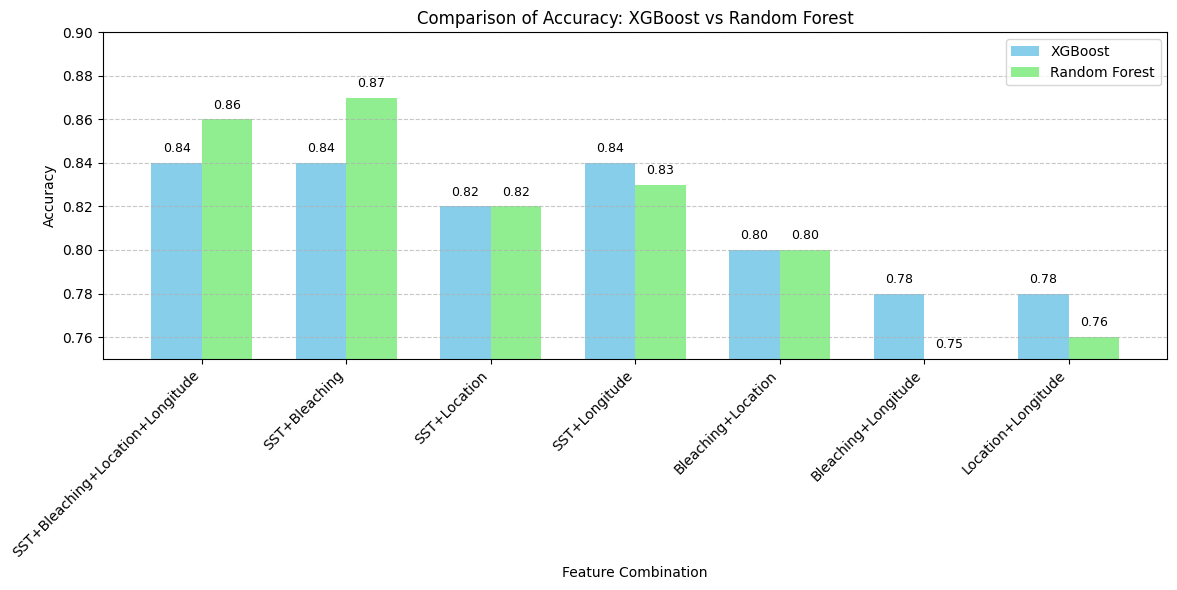

In [ ]:
# STEP 0: Import libraries
import matplotlib.pyplot as plt
import numpy as np

# STEP 1: Define accuracy values from your experiments
# Replace these with actual accuracy values from your runs
accuracy_all_xgb     = 0.84
accuracy_all_rf      = 0.86
accuracy_sstb_xgb    = 0.84
accuracy_sstb_rf     = 0.87
accuracy_sstl_xgb    = 0.82
accuracy_sstl_rf     = 0.82
accuracy_sstlong_xgb = 0.84
accuracy_sstlong_rf  = 0.83
accuracy_bl_xgb      = 0.80
accuracy_bl_rf       = 0.80
accuracy_blong_xgb   = 0.78
accuracy_blong_rf    = 0.75
accuracy_loclong_xgb = 0.78
accuracy_loclong_rf  = 0.76

# STEP 2: Feature combinations
labels = [
    "SST+Bleaching+Location+Longitude",
    "SST+Bleaching",
    "SST+Location",
    "SST+Longitude",
    "Bleaching+Location",
    "Bleaching+Longitude",
    "Location+Longitude"
]

# XGBoost and Random Forest accuracy values
xgb_scores = [
    accuracy_all_xgb, accuracy_sstb_xgb, accuracy_sstl_xgb,
    accuracy_sstlong_xgb, accuracy_bl_xgb, accuracy_blong_xgb,
    accuracy_loclong_xgb
]

rf_scores = [
    accuracy_all_rf, accuracy_sstb_rf, accuracy_sstl_rf,
    accuracy_sstlong_rf, accuracy_bl_rf, accuracy_blong_rf,
    accuracy_loclong_rf
]

# STEP 3: Plotting
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, xgb_scores, width, label='XGBoost', color='skyblue')
plt.bar(x + width/2, rf_scores, width, label='Random Forest', color='lightgreen')

# Annotate bars with accuracy values
for i in range(len(labels)):
    plt.text(x[i] - width/2, xgb_scores[i] + 0.005, f"{xgb_scores[i]:.2f}", ha='center', fontsize=9)
    plt.text(x[i] + width/2, rf_scores[i] + 0.005, f"{rf_scores[i]:.2f}", ha='center', fontsize=9)

# Plot formatting
plt.ylabel('Accuracy')
plt.xlabel('Feature Combination')
plt.title('Comparison of Accuracy: XGBoost vs Random Forest')
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylim(0.75, 0.90)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
